# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'samples/train.p'
testing_file = 'samples/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

Based on the above understanding of the dataset, below load sizes, coodrs and 
the mapping between label id to its description.

In [35]:
sizes_train, coords_train = train['sizes'], train['coords']
sizes_test, coords_test = test['sizes'], test['coords']
from sign_id_to_name import sign_id_to_name

'Speed limit (20km/h)'

The length of the first dimension of features should be the count of samples, while the second, the third are the width, and height of image, respectively. The labels, sizes, coods have the same dimension as the corresponding features'. They are associated with the corresponding features. 

Sign_id_to_name provides mapping to all the signs, thus its cardinality is the number of signs. 

In [3]:
import numpy as np

### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train)[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(sign_id_to_name)

input_depth = 3

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from display_samples import display_samples
# Visualizations will be shown in the notebook.
%matplotlib inline

Find the indices of all classes of traffic signs.

In [5]:
def sign_indices(labels, sign_map):
    indices = []
    for sign_id in sign_map.keys():
        index = -1
        for j in range(index+1, len(labels)):
            if labels[j] == sign_id:
                index = j
                indices.append(index)
                break
    return indices

Labels = {}
Labels['train'] = y_train
Labels['test'] = y_test

indices_train, indices_test = [sign_indices(Labels[t], sign_id_to_name) for t in ['train', 'test']]

Show the samples of all kinds of traffic signs in the training sets, in order to understand the visual appearance of the samples:

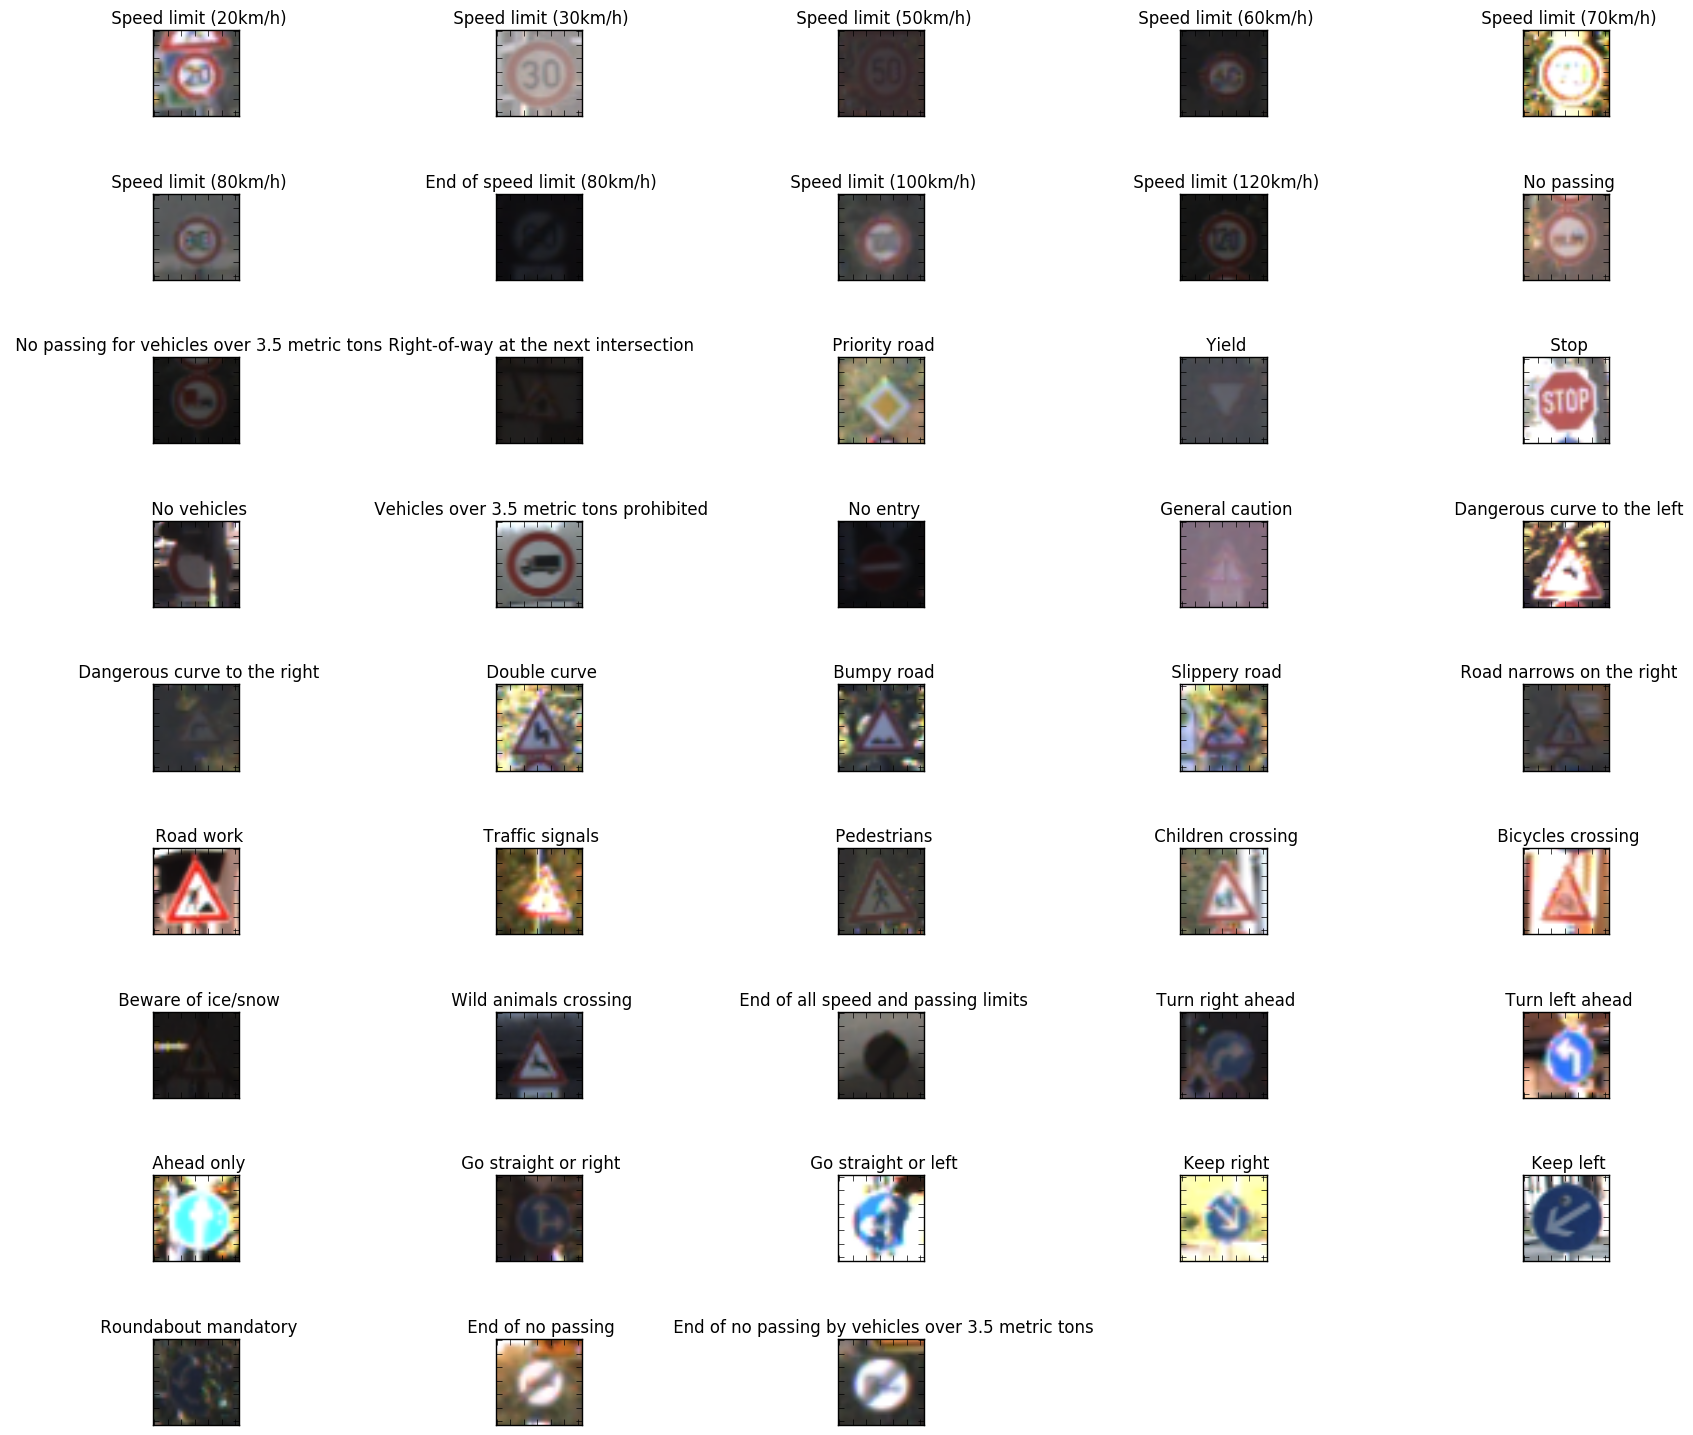

In [6]:
display_samples(X_train[indices_train], y_train[indices_train], '', np.array([]), '', 
                sign_id_to_name, columns=5, indices=slice(None, None))

The samples of all kinds of traffic signs in the test sets:

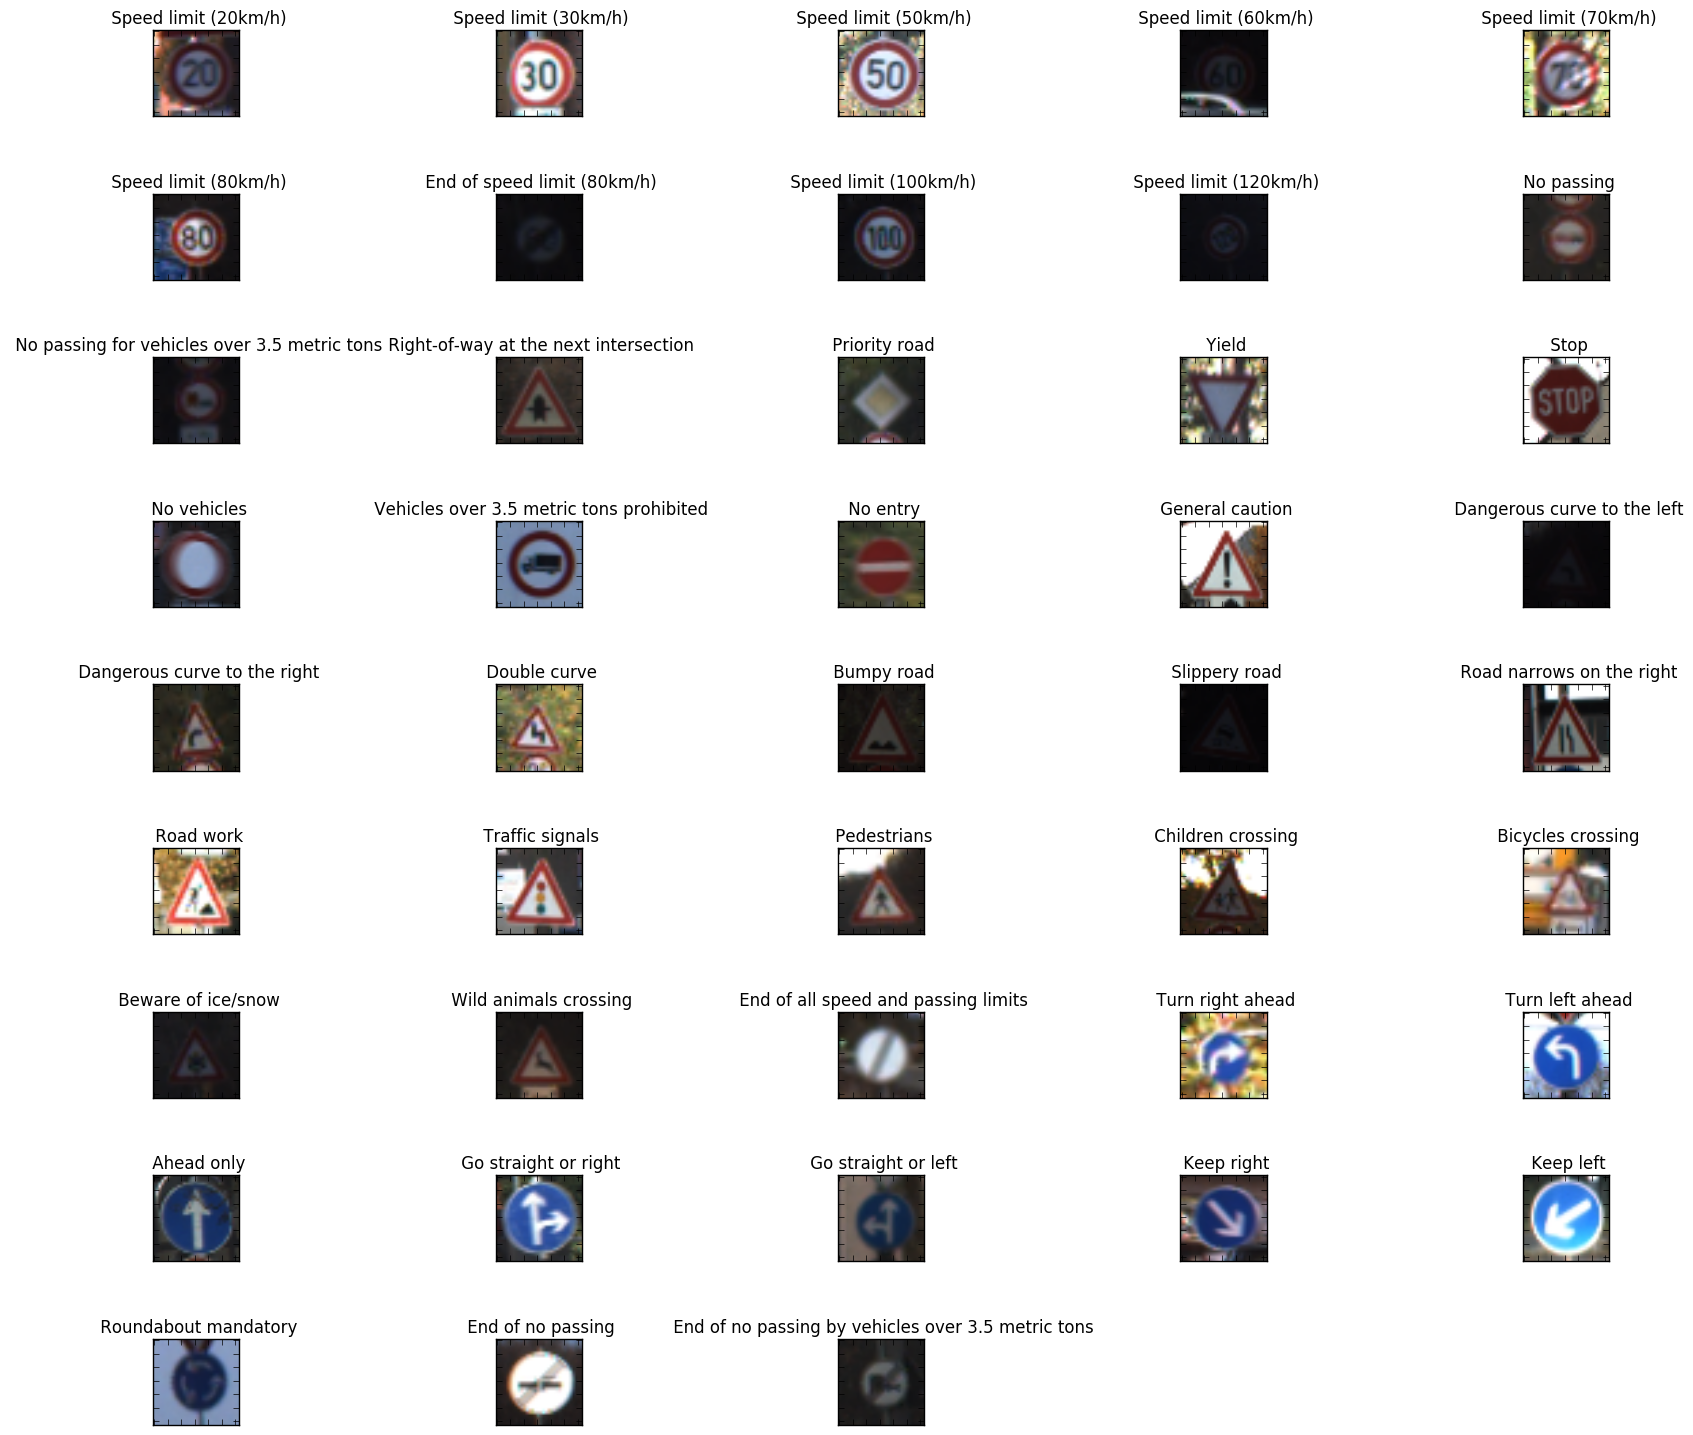

In [7]:
display_samples(X_test[indices_test], y_test[indices_test], '', np.array([]), '', 
                sign_id_to_name, columns=5, indices=slice(None, None))

### Study the distribution of traffic sign classes

In [8]:
class_sample_freq, classes = np.histogram(y_train, bins=np.arange(n_classes + 1 ))
mean_freq = np.mean(class_sample_freq)
classes = classes[:-1]
classes_sorted_by_sample_count = np.argsort(class_sample_freq)
class_names_sorted = [sign_id_to_name[i] for i in classes_sorted_by_sample_count]
class_sample_freq_sorted = class_sample_freq[classes_sorted_by_sample_count]

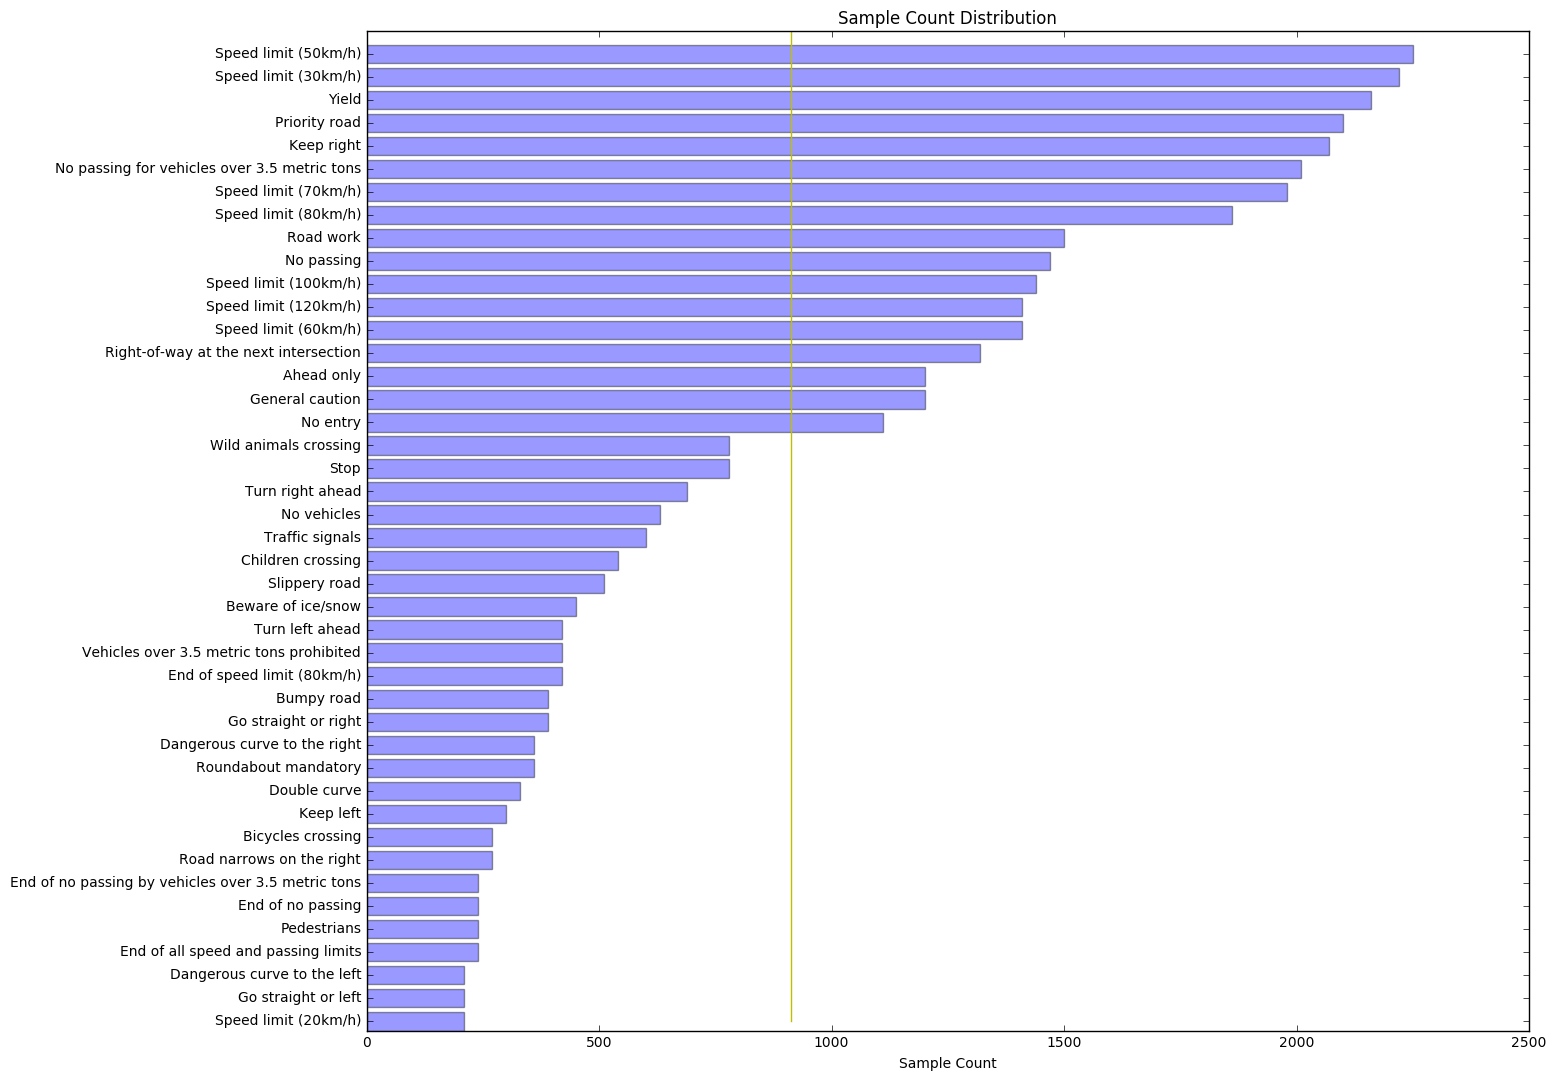

In [9]:
bar_width = 0.3
plt.figure(figsize=(15, n_classes*bar_width))

y_pos = np.arange(len(class_names_sorted))
plt.barh(y_pos, class_sample_freq_sorted,  align='center', alpha=0.4) #xerr=error,
plt.yticks(y_pos, class_names_sorted)
plt.xlabel('Sample Count')
plt.title('Sample Count Distribution')
plt.plot((mean_freq, mean_freq), (0, n_classes), 'y-')
plt.show()

In [10]:
classes_under_represented = classes_sorted_by_sample_count[class_sample_freq_sorted < mean_freq]
print(str.format('The number of under represenetd signs: {}', np.size(classes_under_represented)))
print('The classes under represented from the least to the more (below mean sample count):')
[sign_id_to_name[i] for i in classes_under_represented]

The number of under represenetd signs: 26
The classes under represented from the least to the more (below mean sample count):


['Speed limit (20km/h)',
 'Go straight or left',
 'Dangerous curve to the left',
 'End of all speed and passing limits',
 'Pedestrians',
 'End of no passing',
 'End of no passing by vehicles over 3.5 metric tons',
 'Road narrows on the right',
 'Bicycles crossing',
 'Keep left',
 'Double curve',
 'Roundabout mandatory',
 'Dangerous curve to the right',
 'Go straight or right',
 'Bumpy road',
 'End of speed limit (80km/h)',
 'Vehicles over 3.5 metric tons prohibited',
 'Turn left ahead',
 'Beware of ice/snow',
 'Slippery road',
 'Children crossing',
 'Traffic signals',
 'No vehicles',
 'Turn right ahead',
 'Stop',
 'Wild animals crossing']

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [11]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Augment the traffic signs which are under-represented in the training samples

Upon training experiments, the traffic signs that have too small number of samples tend to be mis-classified, such as "Speed limit (20km/h)". In order to improve the classification of such under-represeneted. The training set is augumented for those traffic signs whose sample counts are below the mean of the sample counts of all signs. The under represented are augumented by simulating variations in image angle, lighiting, and so on from the existing samples of the same traffic sign. The number of augumentation is to increase its sample count to the mean and above by certain margin. The margin is a hyperparameter that can be adjusted. 

The following code implements the augumentation. The procedure of transfor_image is courtesy of: <https://nbviewer.jupyter.org/github/vxy10/SCND_notebooks/blob/master/preprocessing_stuff/img_transform_NB.ipynb>

- The maximum range of rotation is 20 degree.
- The range of affine transformation sheer scale is 10
- The range of translation is 5 pixels.

In [12]:
class_sample_freq, _ = np.histogram(y_train, bins=np.arange(n_classes + 1 ))

from image_transform import transform_image
import math
augmentation_count = np.zeros(n_classes, dtype=np.int) # the counter to control number of augumenattions.
margin_from_mean = 0 # 0, -0.15
diff_from_mean_with_margin = mean_freq*(1 + margin_from_mean) - class_sample_freq

def augument_sample(x, y):
    images_labels = [(x, y)]
    #sample_count = class_sample_freq[y]
    #diff_from_mean_with_margin = mean_freq*(1 + margin_from_mean) - sample_count
    if (0 < diff_from_mean_with_margin[y]) and (augmentation_count[y] <= diff_from_mean_with_margin[y] ):
         
        duplicatons_per_existing_sample = math.ceil(diff_from_mean_with_margin[y]/class_sample_freq[y])
        augmentation_count[y] = augmentation_count[y] + duplicatons_per_existing_sample
        
        # duplicate (x, y) by duplicatons_per_existing_sample times
        return images_labels  + [(transform_image(x, 20, 10, 5), y) for i in range(duplicatons_per_existing_sample)]
    else:
        return images_labels

Shuffle the training samples to let the seeds of augumentation random. 

In [13]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train) # shuffle before augmentation.

In [14]:
# augument X_train based on y_train:
list_of_augumented = [augument_sample(x, y) for x, y in zip(X_train, y_train)]
X_train_aug = []
y_train_aug = []
for list_of_tuples in list_of_augumented:
    for x, y in list_of_tuples:
        X_train_aug = X_train_aug + [x]
        y_train_aug = y_train_aug + [y]
X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

Here are some samples after augumentations.

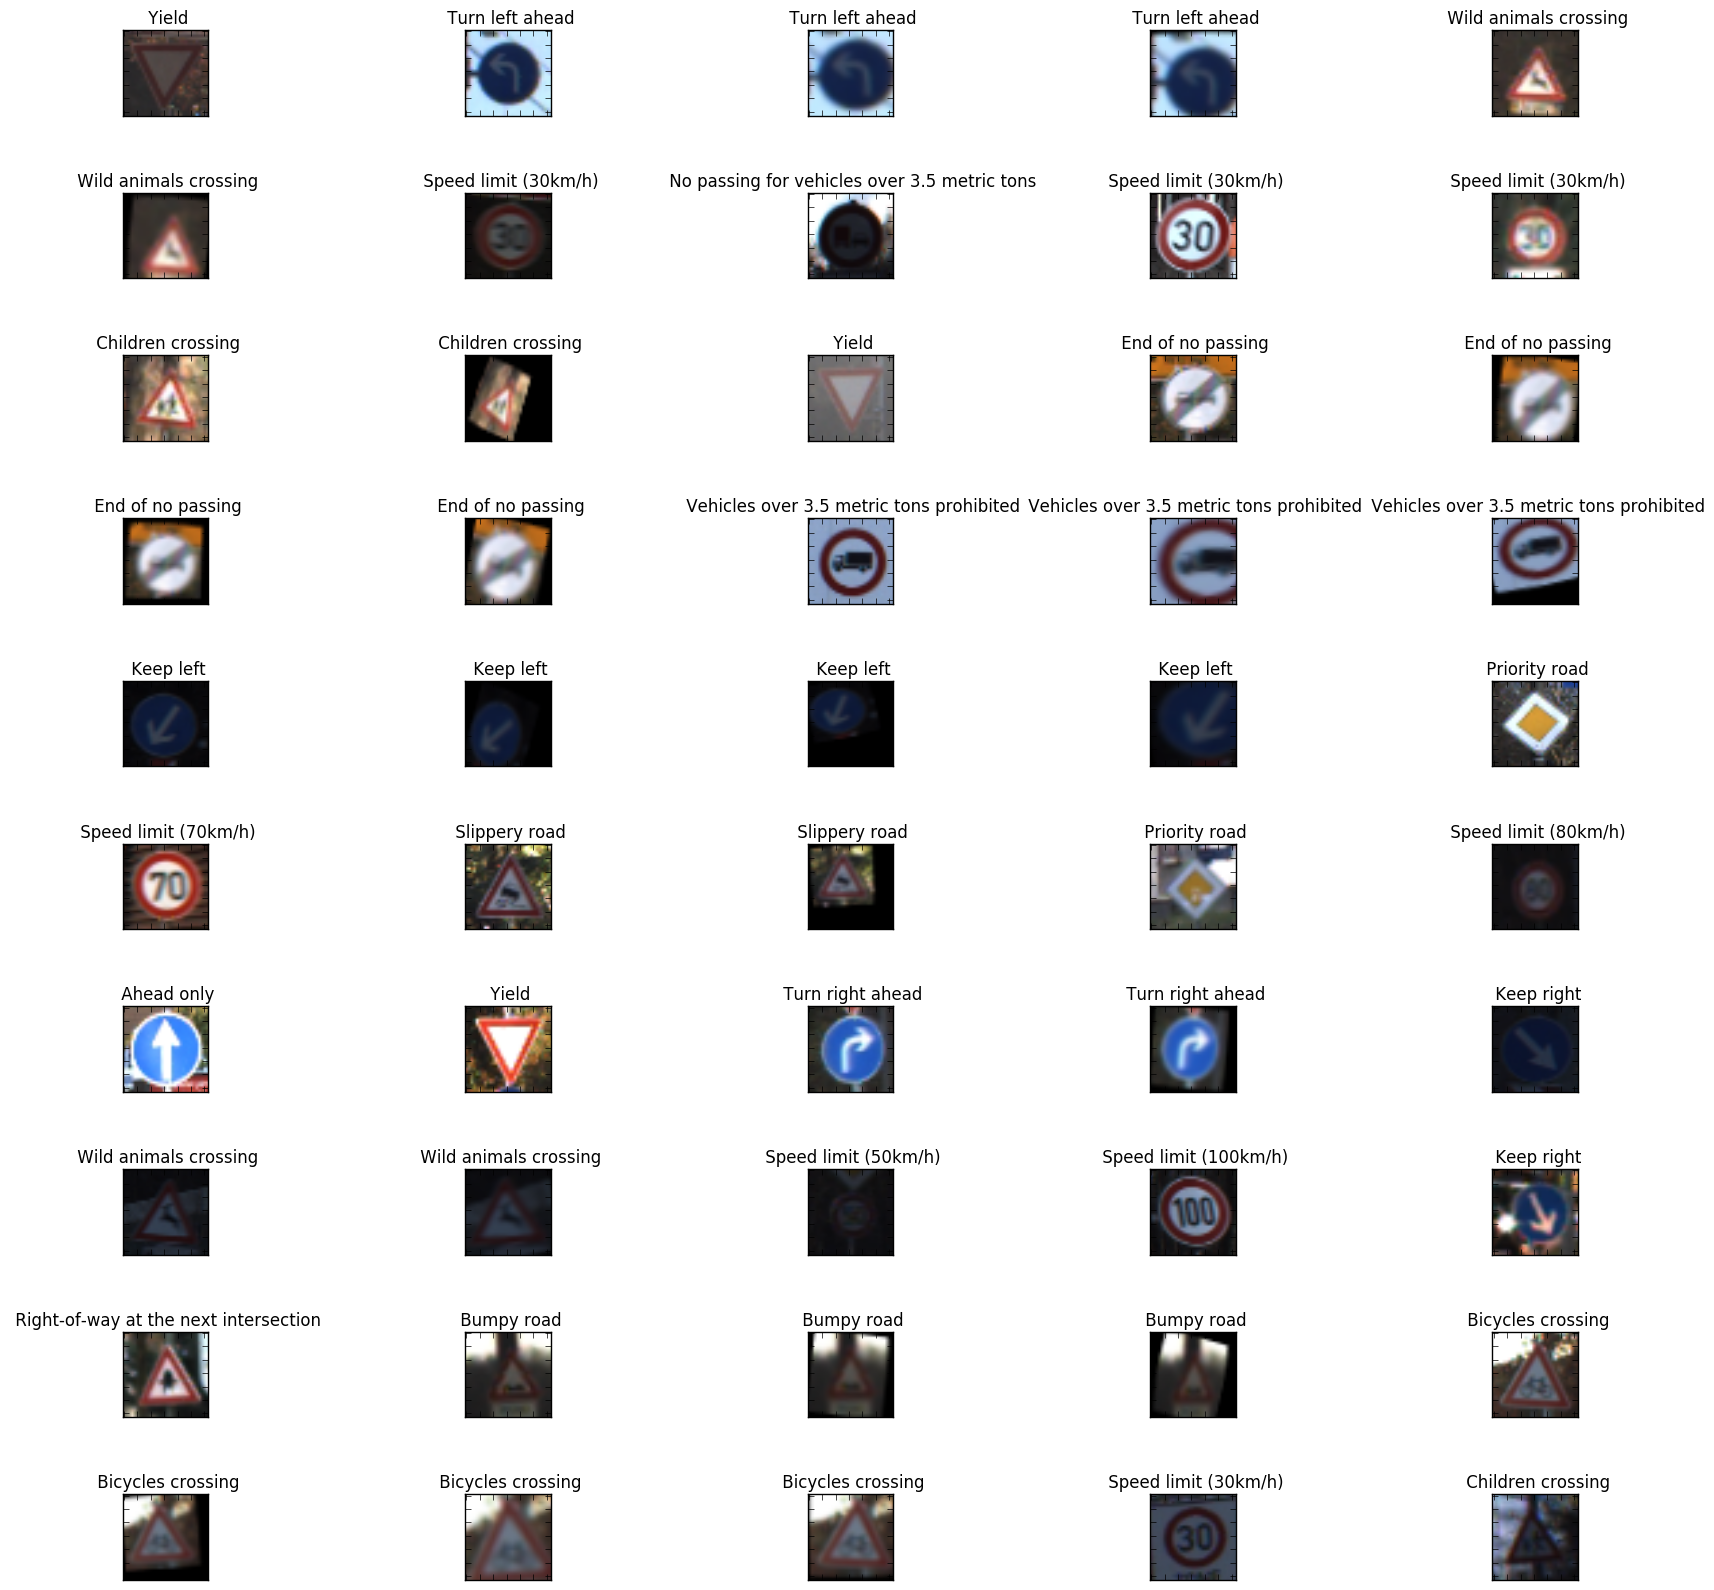

In [15]:
display_samples(X_train_aug, y_train_aug, '', np.array([]), '', 
                sign_id_to_name, columns=5, indices=slice(0, 50))

Here are the distribution after augmentation. 

Those under represeneted have been improved with amount around the original mean. 

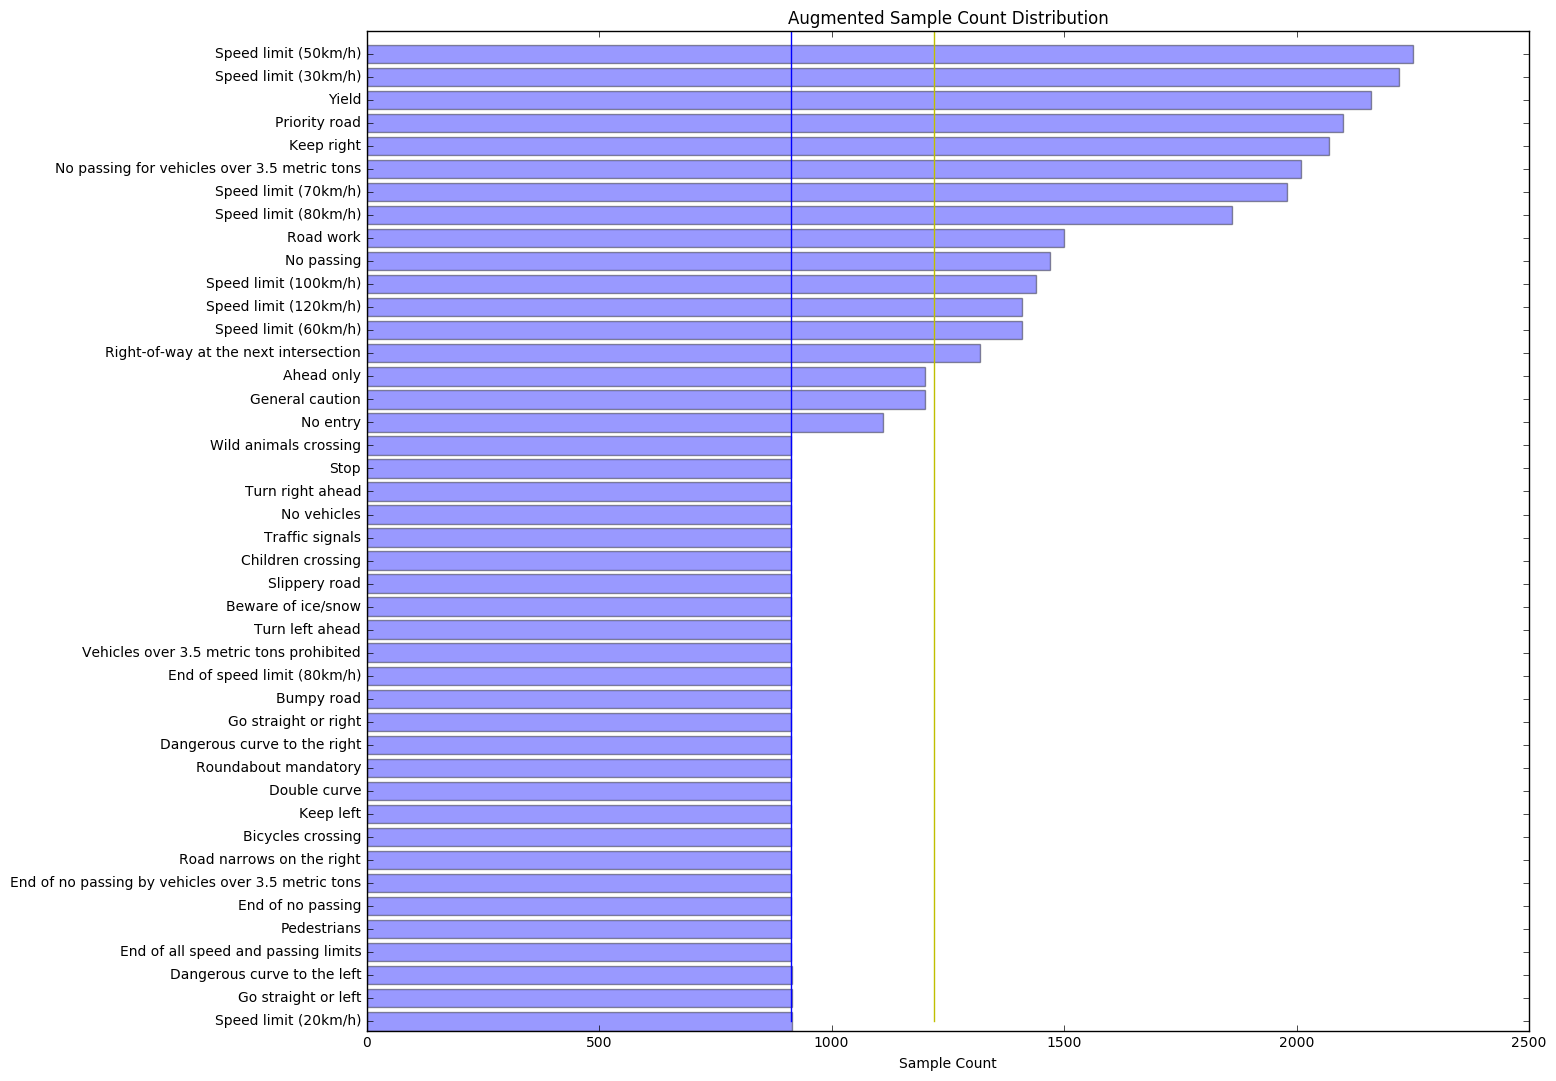

In [16]:
class_sample_aug_freq, classes_aug = np.histogram(y_train_aug, bins=np.arange(n_classes + 1 ))
mean_aug_freq = np.mean(class_sample_aug_freq)
classes_aug = classes_aug[:-1]

class_sample_aug_freq_sorted = class_sample_aug_freq[classes_sorted_by_sample_count]

bar_width = 0.3
plt.figure(figsize=(15, n_classes*bar_width))

y_pos = np.arange(len(class_names_sorted))
plt.barh(y_pos, class_sample_aug_freq_sorted,  align='center', alpha=0.4) #xerr=error,
plt.yticks(y_pos, class_names_sorted)
plt.xlabel('Sample Count')
plt.title('Augmented Sample Count Distribution')
plt.plot((mean_aug_freq, mean_aug_freq), (0, n_classes), 'y-')
plt.plot((mean_freq, mean_freq), (0, n_classes), 'b-')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train_aug, y_train_aug, test_size = 0.2, 
                                                                random_state = 0)

Note: the X_train, y_train are updated with augumented ones. 

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Some images are visually very dark, procedure of normalization, linearly scales image to have zero mean and unit norm,  were performed designing to improve the classification of such images. The implementation of the pre-processing is implemented in the function LeNet below. 

Using 1x1 convolution with depth 3 on the RGB input after the pre-processing of normalization, an adaptive pre-processing of the color space conductive for classification is implemented, in lieu of color space pre-processing. This is an attempt to machine learning to adaptively achieve color space pre-processing. As it's hard for me to decide what color scheme would produce optimal classification. My experiments shows it produces some improvement in the classification accuracy. 

Finally, the training samples are shuffled to ensure the radomness in the sequence of training samples.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The test data is kept not touched until the last to produce the test accuracy.

The training data is split, 80% for training, and 20% for validation during training. 

Out of the resulted training data, augumentation procedure were performed to correct the significant imbalance of sample counts of traffic signs. 

To address the significant imbalance amoung the count of samples of triffic signs. Augmentations procedure were performed to add more samples for those under represeneted signs, in order to improve the accuracy of classifications to those signs. Experiments show indeed improvement to the classifications of some of those. 
For details, please read the section on sample augumentation.

In [18]:
### Desfine your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

keep_prob = tf.placeholder(tf.float32) # probability to keep units
rate = 0.0003 # 0.007, 0.001, 0.07, 0.01, 0.0007, 0.0001
keep_prob_const = 0.5
weight_decay_rate = 0 # 0.1, 0.007
    
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # pre-processing: zero mean, and unit norm.
    x_processed = tf.map_fn(lambda image: tf.image.per_image_standardization(image), x)
    
    # Layer 0: Color adaptation, convolutional. Input = 32x32x3, Output 32x32x3
    conv0_W = tf.Variable(tf.truncated_normal(shape=(1, 1, input_depth, input_depth), mean = mu, stddev = sigma))
    conv0_b = tf.Variable(tf.zeros(input_depth))
    conv0   = tf.nn.conv2d(x_processed, conv0_W, strides=[1, 1, 1, 1], padding='VALID') + conv0_b

    # Activation.
    conv0 = tf.nn.relu(conv0)

    # Layer 1: Convolutional. Input = 32x32x3. Output per kernel_size
    kernel1_size = 5 # 5, 6, 7, 4, 5,9 try large size kernel to encourage extraction of larger features
    conv1_depth = 47 # original 6, guess with more complex feature representations
    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(kernel1_size, kernel1_size, input_depth, conv1_depth), 
                                              mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(conv1_depth))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Layer 2: Convolutional. Output = per kernel2_size
    kernel2_size = 5 # 5, 9
    conv2_W = tf.Variable(tf.truncated_normal(shape=(kernel2_size, kernel2_size, conv1_depth, 16), 
                                              mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten.
    fc0 = flatten(conv2)
    fc0_dim = fc0.get_shape().as_list()[1]
    
    # Layer 3: Fully Connected.
    fc1_output_width = 150 # 120 
    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc0_dim, fc1_output_width), mean = mu, stddev = sigma) , name = 'fc1_W')
    fc1_b = tf.Variable(tf.zeros(fc1_output_width))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Drop-out.
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(fc1_output_width, 84), mean = mu, stddev = sigma), name = 'fc2_W')
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Drop-out.
    # fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
     
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma), name = 'fc3_W')
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    
    # for weights regularization. 
    
    if weight_decay_rate:
        tf.add_to_collection('losses', tf.mul(tf.nn.l2_loss(fc1_W), weight_decay_rate, name='weight_loss'))
        tf.add_to_collection('losses', tf.mul(tf.nn.l2_loss(fc2_W), weight_decay_rate, name='weight_loss'))
        tf.add_to_collection('losses', tf.mul(tf.nn.l2_loss(fc3_W), weight_decay_rate, name='weight_loss'))
        
    logits = tf.matmul(fc2, fc3_W) + fc3_b 
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The architecture is based on LeNet only with the following adaptations:

- The input has R, G, B channels, so the input depth should be 3. 

- The final output should have n_classes of outputs, for classifications of traffic signs (n_classes is the number of traffic sign types).

- There is a convolution layer 0, with kernel size of 1x1 with depth of 3. It's designed to adapt from RGB pixel to learn proper color space conductive for classification. 

- For the orginal convolution layer 1, the kernel size has been increase to 9x9 in order to encourage bigger feature extraction. Also the depth is increased to 47 from the original 6, hoping to capture more complex features. It seems that LeNet is optimized for digit recognition, where the digit figure is much more dominant than the traffic signs. So maybe, the kernel size 5 may not be optimal for traffic sign? Increasing it might help the classifier to focus on bigger features, thus be more robust to variations in traffic signs images. Experiments confirm the intuition. 

- The rest of layers have dimensions adapted to account for the changes in the convolutino layer 1. 

Drop-out were experimented to the fully connected layer 1, and layer 2. But I concluded that it does not help much on the training. 

There is weights regularizations on the fully connected layers. 

There is no other changes to the network architecture.  

In [19]:
### Train your model here.
### Feel free to use as many code cells as needed.

import math
BATCH_SIZE = 5000 # 10000 ran out of GPU memory changed to 5000
EPOCHS = 1200 # from 400, 300, 1000, 600, 500 
print(str.format('The EPOCHS equivalent to the original with increased BATHC_SIZE: {}', 
                 10*(math.floor(BATCH_SIZE/128))))

The EPOCHS equivalent to the original with increased BATHC_SIZE: 390


As there is plenty of memory the GPU, and main board, increasing the BATCH_SIZE from 128 to 10000 is feasible, and may help to improve on the gradient decent's accuracy, thus might result in faster training. With increased BATCH_SIZE, the EPOCHS needs to be increased, as only one batch will have gradient decent once. 

In [20]:
x = tf.placeholder(tf.float32, (None, 32, 32, input_depth))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [21]:
logits = LeNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
cross_entropy_sum = tf.reduce_sum(cross_entropy, name='cross_entropy_sum')
cross_entropy_mean = tf.reduce_mean(cross_entropy, name='cross_entropy')
tf.add_to_collection('losses', cross_entropy_mean)

loss_operation = tf.add_n(tf.get_collection('losses'), name='total_loss')

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [22]:
#predict = tf.argmax(logits, 1)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def cross_entropy_mean(X_data, y_data):
    num_examples = len(X_data)
    total_cross_entropy_mean = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        sum_batch = sess.run(cross_entropy_sum, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_cross_entropy_mean += sum_batch
    return total_cross_entropy_mean/num_examples


The following variable control whether to start to re-train the classifier. 

In [23]:
in_training = True

In [25]:
if in_training:
    epochs = []
    accuracies_training = []
    accuracies_validation = []
    cross_entropy_mean_training = []
    cross_entropy_mean_validation = []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
    
        print("Training...")
        print()
        for i in range(EPOCHS):
            # repeat swapping train and validation
            X_train, X_validation, y_train, y_validation = train_test_split(X_train_aug, y_train_aug, 
                                                                            test_size = 0.2 )
                                                                            #, random_state = 0
            
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_prob_const}) 
                cross_entropy_mean
        
            training_accuracy = evaluate(X_train, y_train)    
            validation_accuracy = evaluate(X_validation, y_validation)
        
            training_cross_entropy_mean = cross_entropy_mean(X_train, y_train)
            validation_cross_entropy_mean = cross_entropy_mean(X_validation, y_validation)
            
            epochs.append(i)
            accuracies_training.append(training_accuracy)
            accuracies_validation.append(validation_accuracy)
            cross_entropy_mean_training.append(training_cross_entropy_mean)
            cross_entropy_mean_validation.append(validation_cross_entropy_mean)
            
            print("EPOCH {} ...".format(i+1))
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
        saver.save(sess, 'lenet')
        print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.052
Validation Accuracy = 0.055

EPOCH 2 ...
Training Accuracy = 0.072
Validation Accuracy = 0.070

EPOCH 3 ...
Training Accuracy = 0.089
Validation Accuracy = 0.088

EPOCH 4 ...
Training Accuracy = 0.171
Validation Accuracy = 0.171

EPOCH 5 ...
Training Accuracy = 0.206
Validation Accuracy = 0.204

EPOCH 6 ...
Training Accuracy = 0.237
Validation Accuracy = 0.242

EPOCH 7 ...
Training Accuracy = 0.265
Validation Accuracy = 0.266

EPOCH 8 ...
Training Accuracy = 0.316
Validation Accuracy = 0.318

EPOCH 9 ...
Training Accuracy = 0.371
Validation Accuracy = 0.367

EPOCH 10 ...
Training Accuracy = 0.414
Validation Accuracy = 0.412

EPOCH 11 ...
Training Accuracy = 0.458
Validation Accuracy = 0.455

EPOCH 12 ...
Training Accuracy = 0.496
Validation Accuracy = 0.489

EPOCH 13 ...
Training Accuracy = 0.527
Validation Accuracy = 0.531

EPOCH 14 ...
Training Accuracy = 0.559
Validation Accuracy = 0.557

EPOCH 15 ...
Training Accuracy = 0.582
Valid

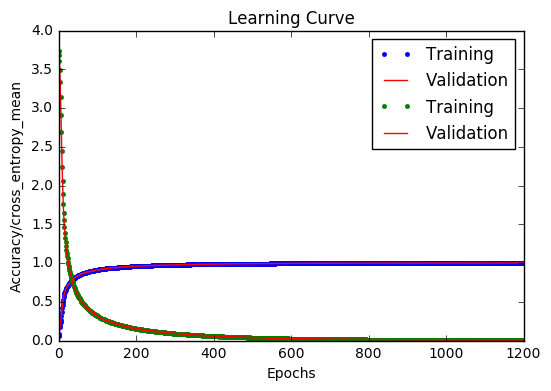

In [27]:
if in_training:
    plt.plot(epochs, accuracies_training,'b.', label="Training")
    plt.plot(epochs, accuracies_validation, 'r-', label="Validation")
    plt.plot(epochs, cross_entropy_mean_training, 'g.', label="Training")
    plt.plot(epochs, cross_entropy_mean_validation, 'r-', label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy/cross_entropy_mean")
    plt.title("Learning Curve")
    plt.legend(loc='best') # place legend to avoid overlapping with curves.

In [28]:
if in_training:
    highest_validation_accuracy_idx = np.argmax(accuracies_validation)
    print(str.format('The highest validation accuracy: {:.3f} reached at EPOCHS: {}', 
                     accuracies_validation[highest_validation_accuracy_idx], highest_validation_accuracy_idx))

The highest validation accuracy: 1.000 reached at EPOCHS: 1082


In [29]:
def predictions(xx, yy, k = 3):
    sess = tf.get_default_session()
    tops = tf.nn.top_k(logits, k)
    values, top_indices = sess.run(tops, feed_dict = {x: xx, y: yy, keep_prob: 1.0})
    rank_of_target_class_and_classified_class = [
        [top_indices[i].tolist().index(yy[i]) if yy[i] in top_indices[i].tolist() else k, top_indices[i][0]] 
            for i in range(len(yy))]
    rank_of_target_class = []
    classified_class = []
    for i in range(len(rank_of_target_class_and_classified_class)):
        rank_of_target_class.append(rank_of_target_class_and_classified_class[i][0])
        classified_class.append(rank_of_target_class_and_classified_class[i][1])
    return [rank_of_target_class, classified_class]

In [52]:
mymodule.x()
reload(mymodule)
mymodule.x()

version 2
version 3


Correct recognition: 100.00%, partial samples:


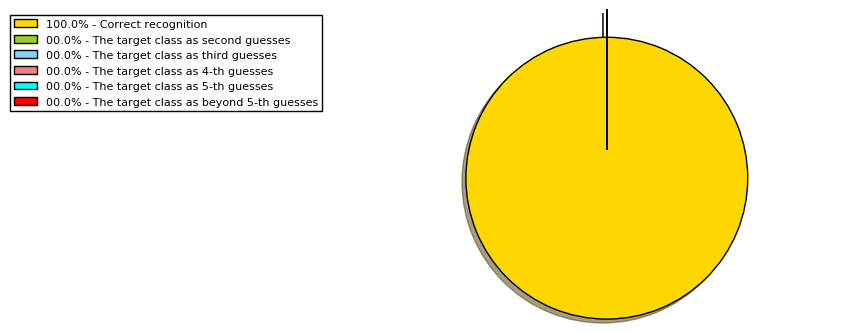

In [53]:
top_pick = 5
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    rank_of_target_class, classified_class = predictions(X_validation, y_validation, k = top_pick)

from showClassifications import show_classifications
#from imp import reload
#reload(showClassifications)
rank_counts = show_classifications(rank_of_target_class, classified_class, X_validation, y_validation, 
                                k = top_pick, limit = 10)

In [31]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.945


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I use the recommended optimizer used by LeNet implementation from Udacity SDC course. 

After experiments, I use rather large batch size, 10000, as my computer can afford the memory resources, and the large batch size may help to implement more accurate gradient decent, so as to learn more accurately, and fast. 

With the increased batch size, the EPOCHS numbers has to be increased, as in each EPOCH, the number of backpropagations thus training is once per batch. Experiments helps to determine the number of EPOCHS to be around 500. 

Also with large batch size, the amount of weights update per iteration becomes very large. Experiments show that the learning rate has to be rather small, around 0.001, as is the coefficient for weights regualarization, 0.007. If the learning rate is larger than or equal to 0.01. The accuracies of training, and validation would severely fluctuate. 

Although I gave up the mechanism of drop-out, rather just use weights regularization to address the slight problem of overfitting. But I observed that with drop-out, the learning rate should be further reduced from 0.001 to 0.0007 to accomodate the drop-out scheme, with which there is compensation of additional weight changes to the weights not being dropped. 


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I choosed LeNet as the basis of my solutions. The reasons that I choose it is due to the recommendation of David, the instructor. He demonstrated that LeNet with bare minimum adaption would be able to reach training accuracy of 96%. It's very impressive performance to start with. Besides I've read LeCunn's paper. It further made me confident with the architecture as the starting point to explore. 

Based on LeNet, with the minimum adaptation, I was able to reproduce the intial performance. Then I have been working on to improve the validation performance further. 

By plotting the learning curve of the accuracies of training, and validations. I can observed the performance of training. Given the already remarkable performance, I have been mainly doing fine tuning to focusing on to improve the validation accuracy.

I noticed that the training and validation are quite synchronized in progress of training. There seemed no problem of overfitting, but any further improvement would be from improve the fitting of the model with the training data. 

I started with tuning the batch size. I reasoned that with bigger batch size, the gradient decent updates would approximate closer to the theorectical algorithm. As my own computer has plenty of memory, and even plenty with its GPU, so I experiment to increase the batch size, and eventually find it still comfortable at 10000. 

However, with increased the BATCH_SIZE , I noticed that the performance actually severely reduced to around 25%, with the original EPOCHS of 10. Upon Googling, I realized that with the significantly increased batch size, the number of times of weights update is significantly reduced in one epoch, as the weights are only updated once in one batch. So I increased the value of EPOCHS to the arrange of 500 (the theorectical equivalent would be 700). The I observed recovered and even improved performance around 98% of validation accuracy.

By increasing the BATCH_SIZE, with the original learning rate, I also observed some oscilation of accuracies. I figured that it's due the much larger BATCH_SIZE, that the amount of weights update may be accumulated with very siginificant amount, so the learning curve has to be much reduced. I experiment to find that the learning rate has to be as small as 0.0001. With such small learning rate, the training is not fast. It usually takes about 3 hours to complete traning to reach the level of 98.5% validation accuracy. 

In order to improve further the validation accuracy, I observed than some training samples are very dark, some of washed color. I figured that some kind of color space transformation might help to improve the classification. But I am not sure which scheme would work better. So I decide to use 1x1 convolution filter with depth 3 at the input layer. As these would be plausible to train an adaptive color space transformation. The experiment turned to be very successful, the performance improved about 0.1%. 

I then found that there were about 0.2% gap between the training accuracy, and vailidation accuracy. I guessed that it might be due some overfitting. So I decided to try drop-out. I experiment a good arrangement is to have drop-out only at the last fully connected layer, with keep-probability at 50%. The validation accuracy eventually reached 99%, with EPOCHS at 500. 

In order to further improve, I tried to increase the depth of the convolution layer 1, from 6 to 47. It helped somehow to improve the validation accuracy for about 0.1%. 

However, I noticed that it still perform very poorly winh new images which I collected. It even failed at some very images of stop signs and some speed limit sign of 20km/h. They are very indentifiable with human eyes. It amazed me that the classifier was able to classify some other samples which are quite challenge to my own eyes. 

So I decide to try processing of standardization. It didn't help much, but not make the performance worse. 

Finally, I started to analyze the distribution of the training samples, and was alarmed by the observations that the numbers of samples are highly imbalanced. Especially, there is strong correlation between the those under represeneth signs and those that were poorly classified. 

For those signs whose numbers are around the mean with some margin, I added more samples by transforming from the existing samples of the same sign, by random rotation, and translation, and affine transformation. 

After the sample augmentation, I found out that the training was much harder to achieve the previous level of accuracy. With validation samples not being augmented, the validation accuracy would be even higher than the training accuracy. This may indicates that I need adjust the hyper parameters, may even need to add more parameters. 

Even though, the training/validation accuracies sufffer. But with the new samples, the classification looks much more reasonable. Some of those apparent signs were correctly recognized. 

In order to improve the accuracy, I decide to remove drop-out, as I feel that it's too distructive, to the already very challenged training task, and replace it with much milder weight regularization. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Study the distribution of traffic sign classes

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [54]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os

import matplotlib.image as mpimg
name_to_sign_id = {
    '30-1': 1,
    '30': 1,
    'animal': 31,
    'curve-1': 19,
    'curve': 19,
    'keep-right': 38,
    'left': 34,
    'no-entry': 17,
    'stop-chinese': 14,
    'stop-distorted': 14,
    'stop': 14,
    'stop1': 14,
    'yield': 13        
}

files = os.listdir('./new-samples/')

lst = [np.array(mpimg.imread(os.path.join('./new-samples/', file))) for file in files]
assert(all(l.shape == (32, 32, 3) for l in lst))  
X_new = np.array(lst)

y_new = np.array([name_to_sign_id[os.path.splitext(file)[0]] for file in files])

Here are the new samples:

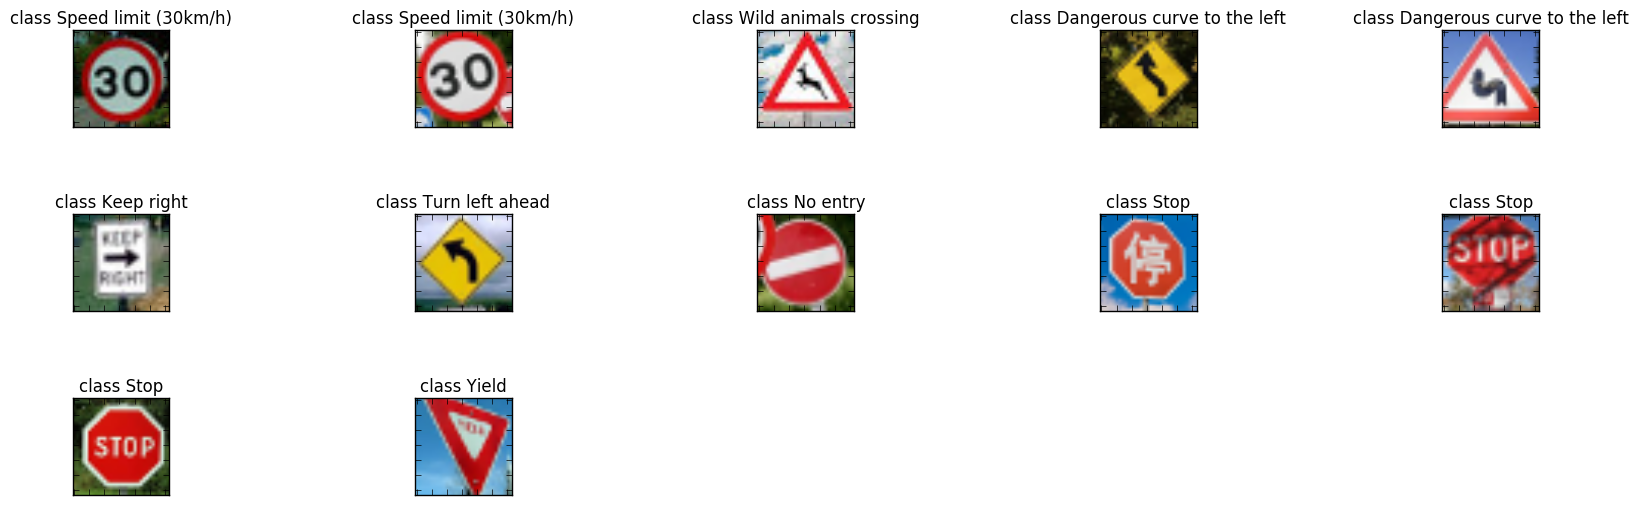

In [33]:
display_samples(X_new, y_new, 'class', np.array([]), '', sign_id_to_name, columns=5)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Correct recognition: 58.33%, partial samples:


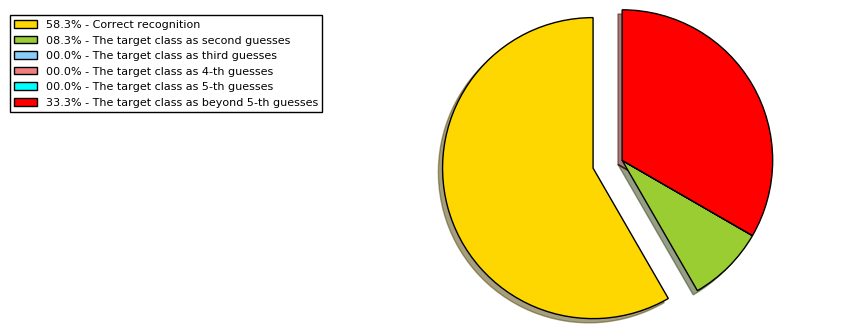

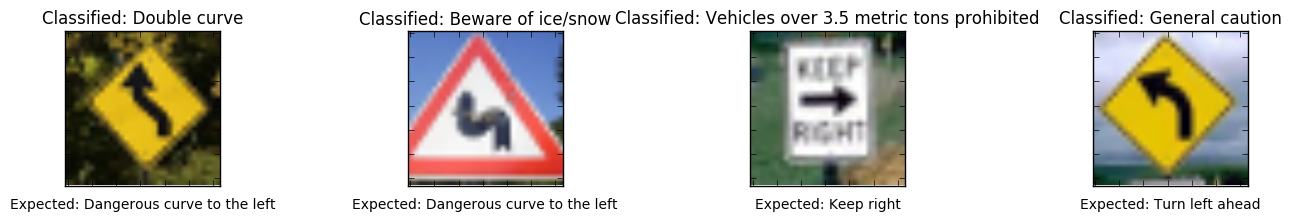

The target class as second guesses: 8.33%, partial samples:


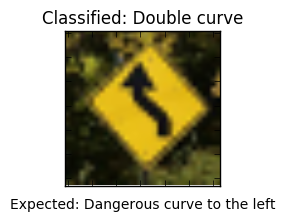

The target class as beyond 5-th guesses: 33.33%, partial samples:


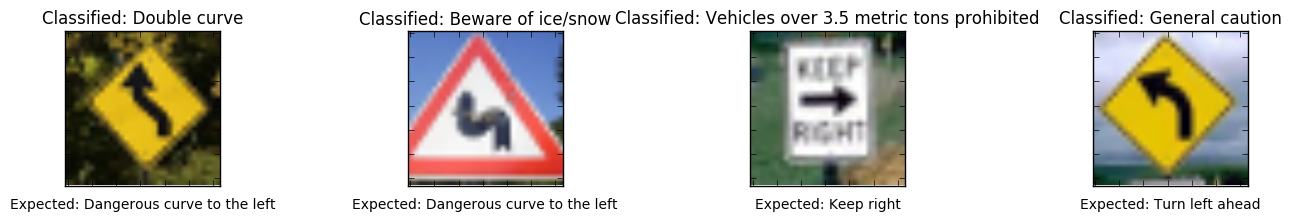

In [55]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
top_picks = 5
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    guesses_n, top_picks_n = predictions(X_new, y_new, k = top_picks)   

stats_n = show_classifications(guesses_n, top_picks_n, X_new, y_new, k = top_picks, limit = 10)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.